<a href="https://colab.research.google.com/github/yuga2005/AI_Test/blob/main/Sentiment_Analyzer_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Sample hotel reviews
reviews = [
    "The Bawarchi Biryani is legendary! The flavors were incredible, the meat was perfectly cooked, and the rice was fluffy and aromatic. It's definitely worth the hype!",
"The Bawarchi Biryani is a Hyderabad classic. It's a good value for the price, but I've had better biryani elsewhere in the city.",
"The service at Bawarchi was terrible. We waited forever for our food, and the waiters were not very attentive.",
"Bawarchi is a must-visit for any biryani lover visiting Hyderabad. The portion sizes are generous, and the atmosphere is lively.",
"The Bawarchi Biryani is a bit greasy for my taste. However, the spices were delicious, and the raita helped to cut through the richness.",
"I was disappointed with the Bawarchi Biryani. The rice was dry, and the meat was a bit tough.",
"We ordered the Bawarchi Mutton Biryani for delivery, and it arrived hot and fresh. The delivery was fast and efficient.",
"Bawarchi is a good option for a casual meal. The biryani is decent, but there are other things on the menu worth trying, like the kebabs.",
"The Bawarchi Double Ka Meetha is a must-try dessert! It's rich, decadent, and the perfect ending to a biryani feast.",
"The place gets very crowded at Bawarchi, especially on weekends. Be prepared to wait for a table.",
"Bawarchi is a local institution, and it's easy to see why. The biryani is delicious, and the prices are affordable.",
"The ambience at Bawarchi is a bit basic, but it's clean and functional.",
"I loved the Chicken 65 at Bawarchi! It was crispy, flavorful, and perfectly spiced.",
"The parking situation at Bawarchi can be a nightmare. Be prepared to walk a bit if you can't find a spot close by.",
"Bawarchi offers great value for money. The biryani portions are large, and the prices are very reasonable.",
"I would recommend Bawarchi for a no-frills biryani experience. It's not fancy, but the food is good and satisfying.",
"Bawarchi is a great place to take a group of friends or family. The portions are large, and there's something on the menu for everyone.",
"I found the biryani at Bawarchi to be a bit bland. It could have used more spices for my taste.",
"Bawarchi is a Hyderabad institution, and it's a must-try for anyone visiting the city. The biryani is delicious, and the portions are generous.",
"The biryani at Bawarchi is good, but it's not the best I've had in Hyderabad. There are other places that offer a more unique and flavorful biryani experience.",
"I love the take-out option at Bawarchi. It's a great way to enjoy their delicious biryani at home.",
"The waiters at Bawarchi can be a bit pushy when it comes to upselling drinks and appetizers.",
"Bawarchi is a great place to experience authentic Hyderabadi cuisine. The biryani is a must-try, but don't forget to try the other dishes on the menu as well.",
"The biryani at Bawarchi is a bit oily, but the flavor is still good.",
"We had a great experience at Bawarchi! The food was delicious, the service was friendly, and the prices were reasonable.",
"The biryani at Bawarchi is a bit overhyped. It's good, but it's not the best biryani in Hyderabad."
]


with open('hotel_reviews.txt', 'w') as file:
    for review in reviews:
        file.write(review + "\n")




# Import Requirements

In [11]:
import torch
from transformers import RobertaForSequenceClassification, RobertaTokenizer
import nltk
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt
from collections import Counter

nltk.download('punkt')

roberta_model = RobertaForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
roberta_tokenizer = RobertaTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Read Reviews data

In [26]:
file_path = 'hotel_reviews.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    reviews = file.readlines()

# For Sentiment Analysis

In [29]:
def sentiment_analysis(text):
  inputs = roberta_tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
  outputs = roberta_model(**inputs)
  scores = outputs.logits.detach().numpy()[0]
  sentiment = scores.argmax()
  if sentiment == 0:
      return "NEGATIVE"
  elif sentiment == 1:
      return "NEUTRAL"
  else:
      return "POSITIVE"

# For passing reviews to sentiment Analysis

In [30]:
problems = []
sentiments_dict = {'POSITIVE':[], 'NEUTRAL':[], 'NEGATIVE':[]}
sentiment_counts = {"POSITIVE": 0, "NEUTRAL": 0, "NEGATIVE": 0}

for review in reviews:
    sentences = sent_tokenize(review)
    sentiment = sentiment_analysis(sentences)
    print(f"Review: {' '.join(sentences)}")
    print(f"Sentiment: {sentiment}\n")
    sentiments_dict[sentiment].append(' '.join(sentences))

    sentiment_counts[sentiment] += 1

    if sentiment in ['NEGATIVE', 'NEUTRAL']:
        problems.append(' '.join(sentences))

Review: The Bawarchi Biryani is legendary! The flavors were incredible, the meat was perfectly cooked, and the rice was fluffy and aromatic. It's definitely worth the hype!
Sentiment: POSITIVE

Review: The Bawarchi Biryani is a Hyderabad classic. It's a good value for the price, but I've had better biryani elsewhere in the city.
Sentiment: NEUTRAL

Review: The service at Bawarchi was terrible. We waited forever for our food, and the waiters were not very attentive.
Sentiment: NEGATIVE

Review: Bawarchi is a must-visit for any biryani lover visiting Hyderabad. The portion sizes are generous, and the atmosphere is lively.
Sentiment: POSITIVE

Review: The Bawarchi Biryani is a bit greasy for my taste. However, the spices were delicious, and the raita helped to cut through the richness.
Sentiment: NEGATIVE

Review: I was disappointed with the Bawarchi Biryani. The rice was dry, and the meat was a bit tough.
Sentiment: NEGATIVE

Review: We ordered the Bawarchi Mutton Biryani for delivery, a

# List the most common Negetive and Neutral reviews

In [31]:
problem_counter = Counter(problems)
most_common_problems = problem_counter.most_common(5)

print("Top Issues Mentioned in Reviews:")
for i, (problem, count) in enumerate(most_common_problems, start=1):
    print(f"{i}. {problem} (Mentioned {count} times)")

Top Issues Mentioned in Reviews:
1. The Bawarchi Biryani is a Hyderabad classic. It's a good value for the price, but I've had better biryani elsewhere in the city. (Mentioned 1 times)
2. The service at Bawarchi was terrible. We waited forever for our food, and the waiters were not very attentive. (Mentioned 1 times)
3. The Bawarchi Biryani is a bit greasy for my taste. However, the spices were delicious, and the raita helped to cut through the richness. (Mentioned 1 times)
4. I was disappointed with the Bawarchi Biryani. The rice was dry, and the meat was a bit tough. (Mentioned 1 times)
5. The place gets very crowded at Bawarchi, especially on weekends. Be prepared to wait for a table. (Mentioned 1 times)


# For adding Visualizing the reviews sentiment analysis

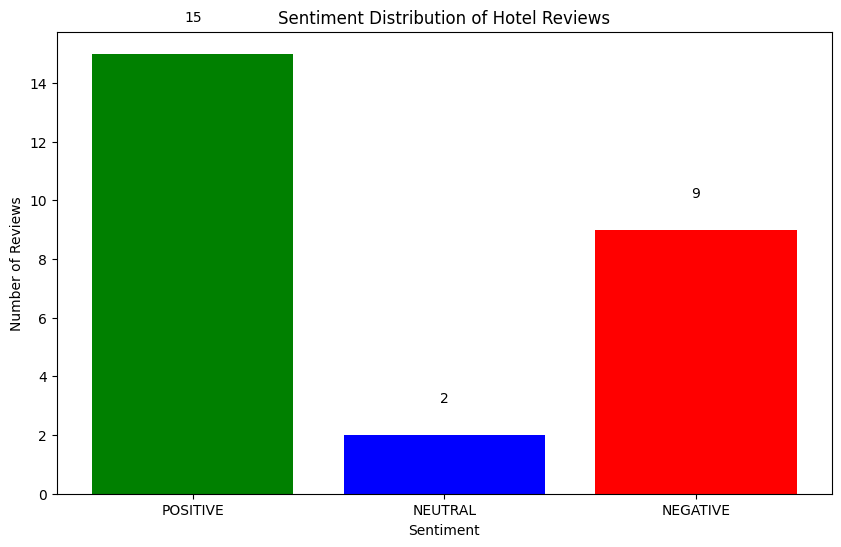

In [32]:
labels = list(sentiment_counts.keys())
sizes = list(sentiment_counts.values())
colors = ['green', 'blue', 'red']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, sizes, color=colors)

# Add text annotations on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Distribution of Hotel Reviews')
plt.show()